In [1]:
%load_ext autoreload
%autoreload 2
from miantiao import pipe, call_pipe

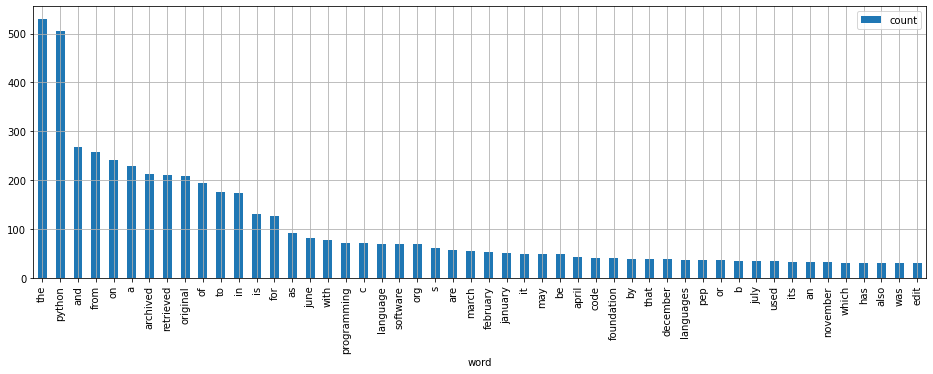

In [2]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import pandas as pd
from miantiao import pipe

@pipe
def word_count(url):
    requests.get() #>#
    P.text #>#
    BeautifulSoup('html.parser') #>#
    P.html.text #>#
    re.findall(r'[A-Za-z]+') #>#
    map(str.lower) #>#
    Counter() #>#
    most_common(50) #>#
    pd.DataFrame(columns=['word', 'count']) #>#
    plot.bar(x='word', y='count', figsize=(16, 5), grid=True)

r = word_count('https://en.wikipedia.org/wiki/Python_(programming_language)');

In [8]:
def concat(data, other):
    return data + other

@pipe
def f(data):
    strip()                     # call method
    split()                     # call method
    P[1:-1]                     # P is the data in pipe
    map(str.upper)           # call global or builtin function 
    list()                      # call global function with pipe data, the same as: list(P)
    remove('123')               # call method, don't update pipe data because the return value is None
    concat(["a", "b", "c"])     # call global function, pass the pipe data as the first argument
    concat(["xyz", 'uvw'], P)   # call global function, don't pass the pipe data as the first argument
    for i in range(1, 4):
        concat(P[:i])           # call global function in loop, use P in expression, pass P as the first argument
    if P[-1] == 'a':            # use P in expression
        concat(["add"])         # call in if

data = "abc str def 123 4567"
f(data)

['xyz',
 'uvw',
 'STR',
 'DEF',
 'a',
 'b',
 'c',
 'xyz',
 'xyz',
 'uvw',
 'xyz',
 'uvw',
 'STR']

In [9]:
 # call the pipe function immediately
 # input data is the global variable `data`
 # output to global variable `r`
@call_pipe
def r(data):
    strip()
    split()
    P[1:-1]
    map(str.upper)
    list()
    remove('123')
    concat(["a", "b", "c"])
    concat(["xyz", 'uvw'], P)
    for i in range(1, 4):
        concat(P[:i])
    if P[-1] == 'a':
        concat(["add"])

r

['xyz',
 'uvw',
 'STR',
 'DEF',
 'a',
 'b',
 'c',
 'xyz',
 'xyz',
 'uvw',
 'xyz',
 'uvw',
 'STR']

In [10]:
# show the source code
@pipe(show_code=True)
def f(data):
    strip()
    split()
    P[1:-1]
    map(str.upper)
    list()
    remove('123')
    concat(["a", "b", "c"])
    concat(["xyz", 'uvw'], P)
    for i in range(1, 4):
        concat(P[:i])
    if P[-1] == 'a':
        concat(["add"])

def _pipe_f(data):
    try:
        (P, _pipe) = (data, Pipe(data, steps=False))
        P = _pipe.strip()
        P = _pipe.split()
        P = _pipe._set_result('[]', P[1:-1])
        P = _pipe.map(str.upper)
        P = _pipe.list()
        P = _pipe.remove('123')
        P = _pipe.concat(['a', 'b', 'c'])
        P = _pipe._set_result('concat', concat(['xyz', 'uvw'], P))
        for i in range(1, 4):
            P = _pipe.concat(P[:i])
        if P[-1] == 'a':
            P = _pipe.concat(['add'])
        return P
    except:
        import traceback
        traceback.print_exc()
        return Steps(_pipe._steps)


In [11]:
# capture all output data, the return value is a Steps instance
@pipe(steps=True)
def f(data):
    strip()
    split()
    P[1:-1]
    map(str.upper)
    list()
    remove('123')
    concat(["a", "b", "c"])
    concat(["xyz", 'uvw'], P)
    for i in range(1, 4):
        concat(P[:i])
    if P[-1] == 'a':
        concat(["add"])
    sorted()
    
steps = f(data)
steps

00: strip
-----
abc str def 123 4567

01: split
-----
['abc', 'str', 'def', '123', '4567']

02: []
--
['str', 'def', '123']

03: map
---
<map object at 0x000002D053E81610>

04: list
----
['STR', 'DEF']

05: concat
------
['STR', 'DEF', 'a', 'b', 'c']

06: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c']

07: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c', 'xyz']

08: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c', 'xyz', 'xyz', 'uvw']

09: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c', 'xyz', 'xyz', 'uvw', 'xyz', 'uvw', 'STR']

10: sorted
------
['DEF', 'STR', 'STR', 'a', 'b', 'c', 'uvw', 'uvw', 'uvw', 'xyz', 'xyz', 'xyz', 'xyz']

In [6]:
# get the 7th output
steps[7]

['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c', 'xyz']

In [7]:
# get all concat outputs
steps['concat']

00: concat
------
['STR', 'DEF', 'a', 'b', 'c']

01: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c']

02: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c', 'xyz']

03: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c', 'xyz', 'xyz', 'uvw']

04: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c', 'xyz', 'xyz', 'uvw', 'xyz', 'uvw', 'STR']

In [8]:
# get the 3th output of concat
steps['concat', 3]

['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c', 'xyz', 'xyz', 'uvw']

In [9]:
# if exception is raised in the function, 
# set steps=True, and run again
@pipe(steps=True)
def f(data):
    strip()
    split()
    P[1:-1]
    map(str.upper, P)
    list()
    remove('123')
    concat(["a", "b", "c"])
    concat(["xyz", 'uvw'], P)
    remove('not exists')
    for i in range(1, 4):
        concat(P[:i])
    if P[-1] == 'a':
        concat(["add"])

f(data)

Traceback (most recent call last):
  File "<dynamic_5>", line 14, in _pipe_f
    P = _pipe.remove('not exists')
  File "c:\Users\ruoyu\Documents\miantiao\miantiao.py", line 27, in __call__
    res = self._func(*args, **kwargs)
ValueError: list.remove(x): x not in list


00: strip
-----
abc str def 123 4567

01: split
-----
['abc', 'str', 'def', '123', '4567']

02: []
--
['str', 'def', '123']

03: map
---
<map object at 0x000002869CB2A640>

04: list
----
['STR', 'DEF']

05: concat
------
['STR', 'DEF', 'a', 'b', 'c']

06: concat
------
['xyz', 'uvw', 'STR', 'DEF', 'a', 'b', 'c']

In [10]:
# pandas example
import pandas as pd
import numpy as np

score = pd.DataFrame(
    [
        (10, '数学', 100),
        (10, '英语', 80),
        (10, '语文', 90),
        (20, '数学', 10),
        (20, '英语', 20),
        (20, '语文', 30),
        (30, '数学', 60),
        (30, '英语', 70),
        (30, '语文', 80),
    ],
    columns=['学号', '科目', '成绩']
)

student = pd.DataFrame(
    [
        (10, 'AAA'),
        (20, 'BBB'),
        (30, 'CCC')
    ],
    columns=['学号', '姓名']
).set_index('学号')

@call_pipe(steps=True)
def result(score):
    groupby("学号", as_index=False)
    agg(平均成绩=("成绩", np.mean))
    loc[P.平均成绩 >= 60]
    merge(student, on="学号")
    P[["姓名", "平均成绩"]]

result

00: groupby
-------
<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002869CB2A160>

01: agg
---
   学号  平均成绩
0  10  90.0
1  20  20.0
2  30  70.0

02: loc
---
   学号  平均成绩
0  10  90.0
2  30  70.0

03: merge
-----
   学号  平均成绩   姓名
0  10  90.0  AAA
1  30  70.0  CCC

04: []
--
    姓名  平均成绩
0  AAA  90.0
1  CCC  70.0

In [11]:
## https://towardsdatascience.com/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac+&cd=1&hl=en&ct=clnk&gl=jp

import pandas as pd
import sys

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']
pclass_age_map = {
    1: 37,
    2: 29,
    3: 24,
}

def replace_age_na(df, fill_map):
    cond=df['Age'].isna()
    res=df.loc[cond, 'Pclass'].map(fill_map)
    df.loc[cond, 'Age']=res
    return df

@call_pipe(steps=True)
def res(url):
    pd.read_csv()
    replace_age_na(pclass_age_map)
    query('Embarked == "S"')
    assign(ageGroup=pd.cut(P.Age, bins=bins, labels=labels))
    pivot_table(values='Survived', columns='Pclass', index='ageGroup', aggfunc='mean')
    rename_axis('', axis='columns')
    rename('Class {}'.format, axis='columns')
    style.format('{:.2%}')

res

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
# a large pipe to plot with altair
# use local variables to save and change pipe data
import altair as alt
from vega_datasets import data

@pipe
def draw(source):
    slider = alt.binding_range(min=1850, max=2000, step=10)
    select_year = alt.selection_single(name='year', fields=['year'],
                                       bind=slider, init={'year': 2000})
    color_scale = alt.Scale(domain=['Male', 'Female'],
                            range=['#1f77b4', '#e377c2'])
    yaxis = alt.Y('age:O', axis=None)
    ### make base                            
    alt.Chart()
    add_selection(select_year)
    transform_filter(select_year)
    transform_calculate(gender=alt.expr.if_(alt.datum.sex == 1, 'Male', 'Female'))
    properties(width=250)
    base = P

    ## make left
    transform_filter(alt.datum.gender == 'Female')
    encode(
        y=yaxis,
        x=alt.X('sum(people):Q',
            title='population',
            sort=alt.SortOrder('descending')),
        color=alt.Color('gender:N', scale=color_scale, legend=None)
    )
    mark_bar()
    properties(title='Female')
    left = P

    ## make middle
    P = base
    encode(y=yaxis, text=alt.Text('age:Q'))
    mark_text()
    properties(width=20)
    middle = P

    ## make right
    P = base
    transform_filter(alt.datum.gender == 'Male')
    encode(
        y=yaxis,
        x=alt.X('sum(people):Q', title='population'),
        color=alt.Color('gender:N', scale=color_scale, legend=None))
    mark_bar()
    properties(title='Male')
    alt.concat(left, middle, P, spacing=5)

draw(data.population.url)

alt.ConcatChart(...)

In [13]:
# a large pipe to plot with altair
# use def to load and save pipe data
import altair as alt
from vega_datasets import data

@pipe(show_code=False)
def draw(source):
    slider = alt.binding_range(min=1850, max=2000, step=10)
    select_year = alt.selection_single(name='year', fields=['year'],
                                       bind=slider, init={'year': 2000})
    color_scale = alt.Scale(domain=['Male', 'Female'],
                            range=['#1f77b4', '#e377c2'])
    yaxis = alt.Y('age:O', axis=None)

    def _() -> base:
        alt.Chart()
        add_selection(select_year)
        transform_filter(select_year)
        transform_calculate(gender=alt.expr.if_(alt.datum.sex == 1, 'Male', 'Female'))
        properties(width=250)

    def base() -> left:
        transform_filter(alt.datum.gender == 'Female')
        encode(
            y=yaxis,
            x=alt.X('sum(people):Q',
                title='population',
                sort=alt.SortOrder('descending')),
            color=alt.Color('gender:N', scale=color_scale, legend=None)
        )
        mark_bar()
        properties(title='Female')

    def base() -> middle:
        encode(y=yaxis, text=alt.Text('age:Q'))
        mark_text()
        properties(width=20)

    def base() -> right:
        transform_filter(alt.datum.gender == 'Male')
        encode(
            y=yaxis,
            x=alt.X('sum(people):Q', title='population'),
            color=alt.Color('gender:N', scale=color_scale, legend=None))
        mark_bar()
        properties(title='Male')

    alt.concat(left, middle, P, spacing=5)

draw(data.population.url)

alt.ConcatChart(...)

In [ ]:
# original altair sample code
import altair as alt
from vega_datasets import data

source = data.population.url

slider = alt.binding_range(min=1850, max=2000, step=10)
select_year = alt.selection_single(name='year', fields=['year'],
                                   bind=slider, init={'year': 2000})

base = alt.Chart(source).add_selection(
    select_year
).transform_filter(
    select_year
).transform_calculate(
    gender=alt.expr.if_(alt.datum.sex == 1, 'Male', 'Female')
).properties(
    width=250
)


color_scale = alt.Scale(domain=['Male', 'Female'],
                        range=['#1f77b4', '#e377c2'])

left = base.transform_filter(
    alt.datum.gender == 'Female'
).encode(
    y=alt.Y('age:O', axis=None),
    x=alt.X('sum(people):Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('gender:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Female')

middle = base.encode(
    y=alt.Y('age:O', axis=None),
    text=alt.Text('age:Q'),
).mark_text().properties(width=20)

right = base.transform_filter(
    alt.datum.gender == 'Male'
).encode(
    y=alt.Y('age:O', axis=None),
    x=alt.X('sum(people):Q', title='population'),
    color=alt.Color('gender:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Male')

alt.concat(left, middle, right, spacing=5)